### ARIMA AND SEASONAL ARIMA

### Autoregressive intrgrated moving averages

 The general process for arima models is the following
 
1.Visualize the time series data

2.Make the time series data stationary

3.Plot the correlation and autoCorrelation charts

4.Construct the ARIMA OR SEASONAL ARIMA MODEL  based on the data

5.Use the model to make predictions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('Perrin Freres monthly champagne sales millions.csv')

In [3]:
df  #month and monthly avg sales

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [4]:
df.columns=['month','sales']
df

,month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [5]:
df.drop(105,axis=0,inplace=True)

In [6]:
df.drop(106,axis=0,inplace=True)

In [7]:
df.tail()

,month,sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [8]:
#Month is in string format so we convert into date time
df['month']=pd.to_datetime(df['month'])
df

,month,sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [9]:
df.set_index('month',inplace=True)
df

,sales
month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [10]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Visualize the data

<AxesSubplot:xlabel='month'>

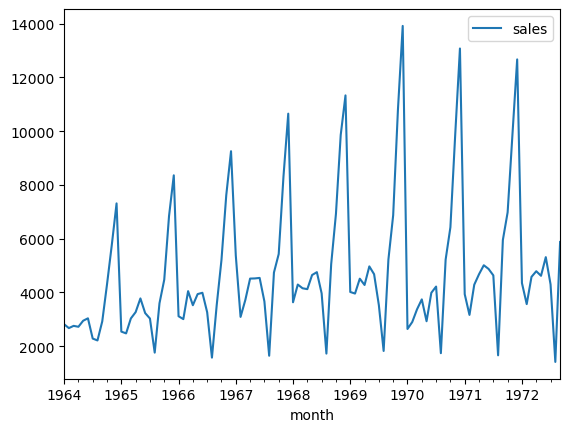

In [11]:
df.plot()
#seasonal data(up's and down's) (not stationary)

In [12]:
#Testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [13]:
test_result=adfuller(df['sales'])

In [14]:
# H0: It is not stationary
# H1: Is is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistic','p.value','Lags used','Number of observations used']
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=0.05:
        print('strong evidence against the null hyphothesis(H0),reject the null hypothesis,indicatong it is stationary')
    else:
        print('weak evidence against the null hyphothesis(H0),reject the null hypothesis,indicating it is non-stationary')

In [15]:
adfuller_test(df['sales'])

ADF Test Statistic:-1.8335930563276228
p.value:0.363915771660245
Lags used:11
Number of observations used:93
weak evidence against the null hyphothesis(H0),reject the null hypothesis,indicating it is non-stationary


# Differencing
If the data is non stationaray then we have  2 things to do

1.Differencing(Shifting e.i lags)

In [16]:
df['sales first difference']=df['sales']-df['sales'].shift(1)
df['sales first difference']

month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: sales first difference, Length: 105, dtype: float64

In [17]:
#again test dickey fuller test
adfuller_test(df['sales first difference'].dropna())

ADF Test Statistic:-7.189896448051031
p.value:2.5196204473866204e-10
Lags used:11
Number of observations used:92
strong evidence against the null hyphothesis(H0),reject the null hypothesis,indicatong it is stationary


#### Here the data looks seasonal and based on seasonality of data the time is taken over here is 12 months that is one has 12 months (in above graph there is ups and down)

In [18]:
df['seasonal first difference']=df['sales']-df['sales'].shift(12)

In [19]:
df.head(14)  

,sales,sales first difference,seasonal first difference
month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [20]:
#again test dickey fuller test
adfuller_test(df['seasonal first difference'].dropna())

ADF Test Statistic:-7.626619157213162
p.value:2.060579696813685e-11
Lags used:0
Number of observations used:92
strong evidence against the null hyphothesis(H0),reject the null hypothesis,indicatong it is stationary


<AxesSubplot:xlabel='month'>

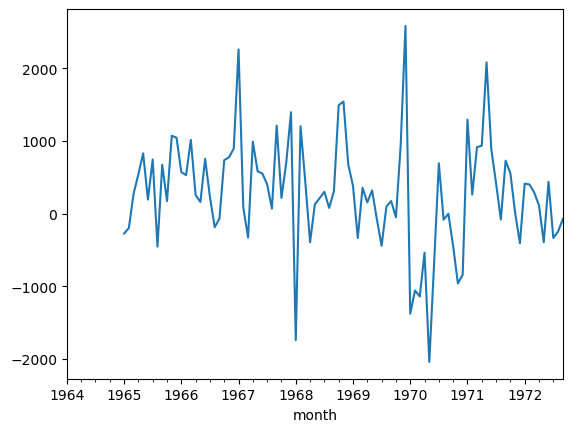

In [21]:
df['seasonal first difference'].plot()

## Auto Regressive Model

How many lags we have to take suppose we have to predict the sales of today then how many previous day data should we consider and that can only done by auto regressive correlation.

#### Identifiaction of AR model is often done with the PACF(partial auto correlation).
In arima model we have to gave 3 values p,q and d

p - AR model lags

d- differencing

q- moving average lags


### Autocorrelation and partial autocorrelation

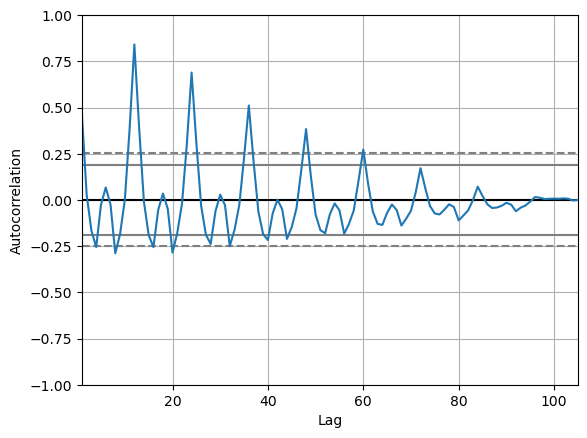

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the autocorrelation plot using the 'plotting' module in Pandas
pd.plotting.autocorrelation_plot(df['sales'])

# Display the plot
plt.show()


## Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p,d,q p AR model lags d differencing q MA lags

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\Users\patil\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


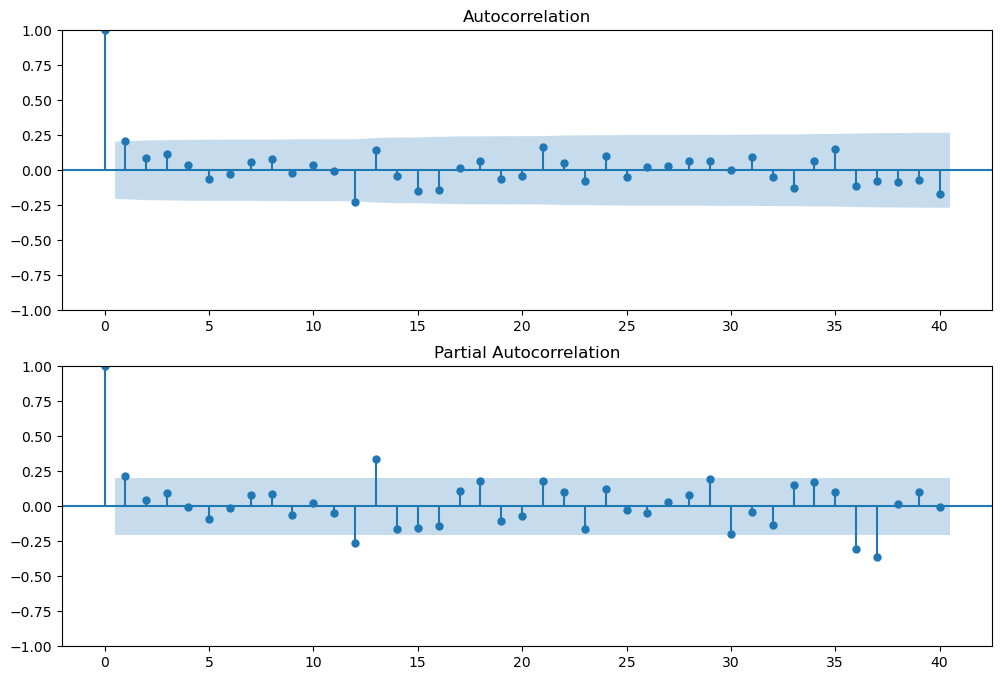

In [24]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)

# Plot the autocorrelation using the 'plot_acf' function from statsmodels
fig = sm.graphics.tsa.plot_acf(df['seasonal first difference'].iloc[13:], lags=40, ax=ax1)

# Create another subplot for the partial autocorrelation plot
ax2 = fig.add_subplot(212)

# Plot the partial autocorrelation using the 'plot_pacf' function from statsmodels
fig = sm.graphics.tsa.plot_pacf(df['seasonal first difference'].iloc[13:], lags=40, ax=ax2)

# Display the plot
plt.show()

### Pacf(shuts off)
In one  first case it is very very high and 2nd it come down that is there is some correlation and at 3rd case it very low(sudden shuton-shut off)

### Arima should be selectedonly when ur data is not seasonal. But in this case data is seasonal.just to show arima model we are doing this.
As it is seasonal data it will not work well.

In [25]:

#p=1, d=1, q=0 or 1
#p-lags
#d-differencing
#q-moving avg lags
from statsmodels.tsa.arima_model import ARIMA

In [26]:

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Create and fit the ARIMA model
model = ARIMA(df['sales'], order=(1, 1, 1))
model_fit = model.fit()


C:\Users\patil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\patil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\patil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Wed, 10 May 2023   AIC                           1911.627
Time:                        01:16:48   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='month'>

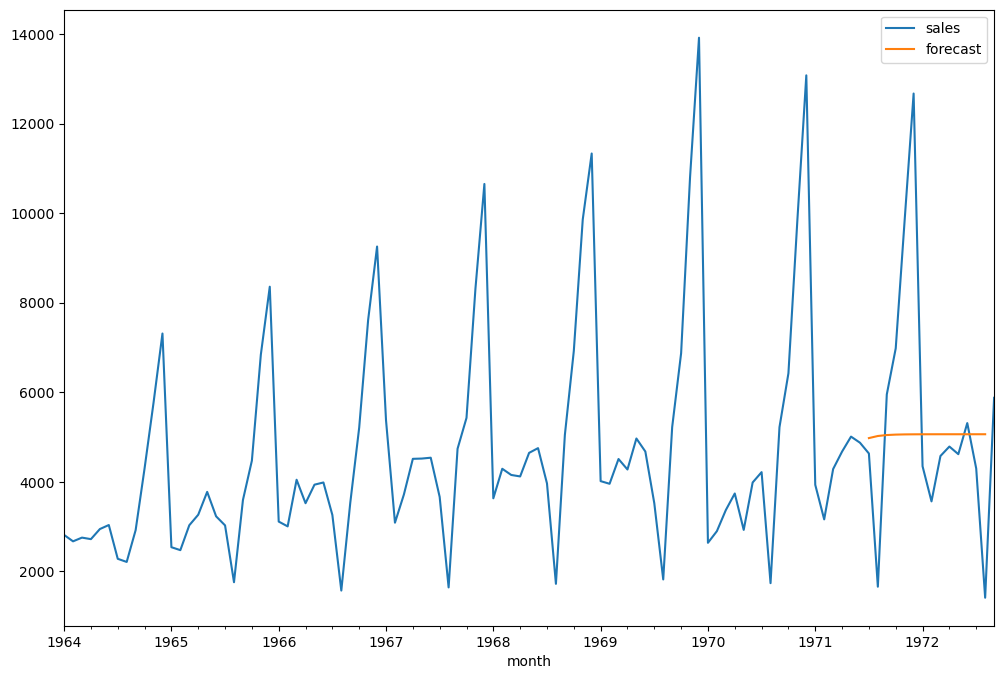

In [28]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

### Excat way

In [29]:
model=sm.tsa.statespace.SARIMAX(df['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\patil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\patil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='month'>

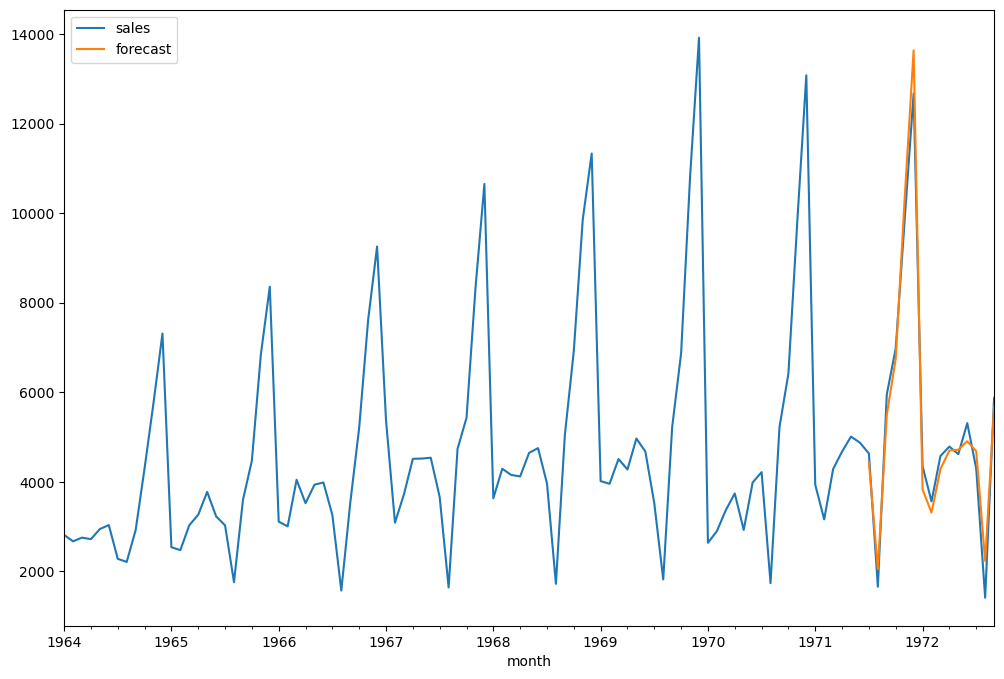

In [30]:
df['forecast']=results.predict(start=90,end=106,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [31]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [32]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [33]:
future_datest_df.tail()

,sales,sales first difference,seasonal first difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [34]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

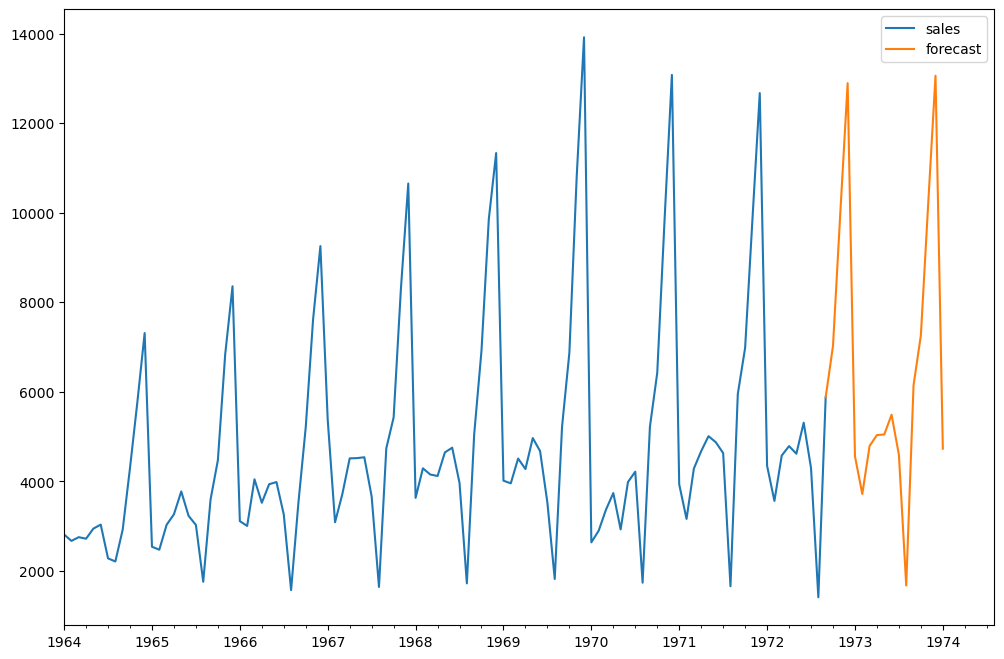

In [35]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['sales', 'forecast']].plot(figsize=(12, 8)) 